# Meta Learning  or Learning to Learn

## 1 Background

### Why few-shot learning?

<font color = red>Deep learning models need a large number of training data points</font>
- In 1980, Kunihiko Fukushima developed the first convolutional neural networks. 
- In 2015, Kaiming He and his team at Microsoft reported that their model performed better than humans at classifying images from ImageNet. At that point, one could argue that computers became better than us at harnessing billions of images to solve a specific task.

<font color = red>Data is always scare </font>
- You are not Google or Facebook, you won’t always be able to build a dataset with that many images. 
- in practice, you sometimes have to classify images with only one or two examples per label. 
- Show a picture of an elephant to a baby and they will never fail to recognize an elephant from now on. If you do the same thing with your Resnet50, you might get disappointed by the result.

<font color = blue> This problem of learning from few examples， i.e., few-shot learning. </font>
- In the last lecture, we touch two issues of few-shot learning, i.e., the curse of dimensionality (i.e., metric learning to learn similarity function), overfitting (i.e., generate data points) 


#### <font color = red>Solutions for two issues, i.e., the curse of dimensionality (i.e., metric learning to learn similarity function), overfitting (i.e., generate data points), and evaluation (N-way one shot learning) </font>
- Few samples using L2 distance easily results in the issue of curse of dimensionality as well as the overfitting model. TO address them, few-shot learning learns the similarity functions rather than the fixed L2 distance to solve the issue of curse of dimensionality, as well as adds the sample number (from C $\times E$  to $\binom{C \times E}{2}$, where c is the class number and E is the sample number in each class. 
- In the evaluation stage of few-shot learning, for every pair of input images, our model generates a similarity score between 0 and 1. 

<font color = red>Meta learning, as known as, learning to learn</font>

![Example of a 4-way one shot learning](https://images.ctfassets.net/be04ylp8y0qc/bZhboqYXfYeW4I88xmMNv/7c5efdc368206feaad045c674b1ced95/1_AteD0yXLkQ1BbjQTB3Ytwg.png?fm=jpg) 
Example of a few-shot classification task: <font color = blue>given the K=2 instances for each of the N=3 classes in the support set, we want to label the Q=4 dogs from the query set as Labrador, Saint-Bernard or Pug</font>. Even if you had never seen any Pug, Saint-Bernard or Labrador, this would be pretty easy for you. But to solve this with AI, we are going to need some meta-learning.



### <font color = red>Our slides called training tasks (including support set and query set) and testing tasks (train set and test set)</font>

### <font color = red>This sample has meta-training (including base set) and meta-testing (including support set and query set)</font>
 
### N-way K-Shot Image Classification task

   - 1 a support set composed of N labels and, for each label, K labeled images;
   - 2 a query set composed of Q query images; 

the task is to classify the query images among the N classes given the $N \times K$ images in the support set. When K is small (typically K<10), we talk about few-shot image classification (or one-shot in the case where K=1).



### Problems
- <font color = blue>Given support set: K=2 instances for each of the N=3 classes, i.e., 2 images for Labrador, 2 images forSaint-Bernard, and 2 images for Pug</font>
 <font color = blue>Given query set: 4 dog images</font>
- <font color = blue>Task: classifying each of 4 images in the query set.</font>



## 2 Meta-Learning paradigm

- <font color = red>Given one task to solve</font>, the traditonal classification task is learning “if its performance at the task improves with experience”

- <font color = red>Given a family of tasks to solve</font>, the meta learning is learning to learn if “its performance at each task improves with experience and with the number of tasks”.

Meta learning doesn’t learn how to solve a specific task. It successively learns to solve many tasks. And each time it learns a new task, it becomes better at learning new tasks: it learns to learn.


- <font color = blue>Formally, if we want to solve a task T, the meta-learning algorithm is trained on a batch of training tasks {Tᵢ}. The training experience gained by the algorithm from its attempts at solving these tasks is used to solve the ultimate task T.</font>

For instance, consider the task T shown in the previous figure. It consists in labeling images as Labrador, Saint-Bernard or Pug using the information from 3x2=6 labeled images of those same breeds. One training task Tᵢ could be to label images as Boxer, Labradoodle, or Rottweiler, using the information from 3x2=6 labeled images of the same breeds. 

- <font color = blue>The meta-training process is a succession of these tasks Tᵢ, with, each time, different breeds of dogs. We expect the meta-learning model to get better “with experience and the number of tasks”. Finally, we evaluate the model on T.</font>


![Example of a 4-way one shot learning](https://images.ctfassets.net/be04ylp8y0qc/6OkUycpbFl6IObz8yhDUF7/a809b157fef6d4a951bb9c219242f5dd/1_XpEAdrD-TWibfU1BUpXZRQ.png?fm=jpg) 
We evaluate the meta-learning model on Labradors, Saint-Bernards, and Pugs, but we just train on every other breeds.



- <font color = red>Question 1: how does meta learning solve the problem?</font>

 <font color = blue> Step 1: borrow dog images from other place to add the sample number</font>
 
Need a meta-training dataset (as known as base set) with a lot of dogs from a lot of different breeds.
You could use for instance the Stanford Dogs Dataset (http://vision.stanford.edu/aditya86/ImageNetDogs/), which contains more than 20k dogs extracted from ImageNet. Note that the base set doesn’t need to contain any Labrador, Saint-Bernard or Pug for the process to work.

- <font color = blue> Step 2: Learning the tasks or epoches from the base set</font>

From the base set, we sample batches of episodes (i.e., tasks in our slides). Each episode corresponds to an N-way K-shot classification task Tᵢ that resembles T (typically we use the same N and K) and also including training data (i.e., the first 3 columns in the base set) and test data (i.e., the fourth or last column in the base set). After the model solved every episode in the batch (i.e. it labeled the images of every query set), the parameters of every episode are updated. This is usually done by backprogating the loss resulting from its classification inaccuracy on the query sets.

- <font color = blue> Step 3: Learning the tasks or epoches from the base set</font>
As a result, the base set with N episodes outputs <font color = red> $F^*$</font>, in the new tasks (i.e., meta learning), <font color = red> $F^*$</font> use the support set to learn the prediction model <font color = red> $f^*$</font> for the query set.

<font color = red> NOTE THAT </font> The terms are different between <font color = red> Slides </font> and <font color = blue> Here </font>. 

- We have <font color = red> Training Tasks </font> (<font color = blue>Meta-training</font>) and <font color = red>Testing tasks</font> (<font color = blue>Meta-testing</font>).

- Each <font color = red>Training Task</font>  includes <font color = red>support set</font>  and <font color = red>query set</font>. 

- Each <font color = red>Testing Task</font>  includes <font color = red>Train set</font>  and <font color = red>Test set</font>.


- Each <font color = blue>Meta-training</font>  includes <font color = blue>Train set</font>  and <font color = blue>Test set</font>. 

- Each <font color = blue>Meta-testng</font>  includes <font color = blue>Support set</font>  and <font color = blue>Query set</font>.



## 3 Model-Agnostic Meta-Learning (MAML)

The core idea of this algorithm is to train a neural network towards parameters that can adapt quickly and with few examples to a novel classification task. 

The following example visualizes how MAML works on one episode of meta-training (i.e. on a few-shot classification task Tᵢ sampled from the base set D). Assume you have a neural network M parameterized with 𝚯:


![Example of a 4-way one shot learning](https://images.ctfassets.net/be04ylp8y0qc/13suxWHJZMjFp6FG1hOZBe/fd3a62a1f53e546145460721fbb91b06/1_7rfHUZzTSIYKQ8ZfnehZHw__1_.png?fm=jpg) 
A meta-training step of the MAML model, parameterized with 𝚯



 - 1. Create a copy of nueral network M (here named f)and initialize it with 𝚯 (on the figure, 𝜽₀=𝚯).
   
 - 2. Quickly fine-tune f on the support set (only a few gradient descents).
  
 - 3. Apply the fine-tuned f on the query set.
   
 - 4. Backpropagate the loss resulting from the classification error through this whole process, and update 𝚯. 

Then, in the next episode, we create a copy of the updated model M, we run the process on a new few-shot classification task, and so on.

During meta-training, the MAML learns initialization parameters that allow the model to adapt quickly and efficiently to a new few-shot task with new, unseen classes.

## 4 Case study (Transfer learning vs. MAML Vs. Reptile)

In this 10-shot regression problem, each task consists in learning a modified sine function. Specifically, for each task, the underlying function will be of the form <font color = red>y = a sin(x + b)</font>, with both <font color = blue>a</font> and <font color = blue>b</font> chosen randomly, and the goal of three methods is to predict  <font color = blue>a</font> and <font color = blue>b</font> (such as a = 0.2 and  b = 0.1) based on only 10 pairs of (x, y) .

<font color = blue>Original task</font>

More specifically, we first set a = 0.2 and b = 0.1 as the ground truth, and then generate  60 pairs of (x, y) by satisfying the constraint $y = 0.2 sin(x + 0.1)$. Furthermore, you have 10 pairs of (x,y) as the support set, and 50 x's in the left 50 pairs of (x, y) as the query set as we keep 50 corresponding y's as the ground truth.

<font color = blue>Data pre-processing</font>
- Given the 10-shot learning task, three methods generate the base set for Meta-training and regard the above data provided by the user for Meta-testing. 

- To generate the base set, three methods generate 10k tasks for Meta-training, each task includes 10 samples for traning and 50 samples for test. 60 samples in each task are generated based on different a and b of  $y = a sin(x + b)$. As a result, each task is different from other tasks in either Meta-training or Meta-testing.

- However, three methods generate 1k tasks for Meta-training, each task includes 10 samples for traning and 50 samples for test.

It is noteworthy that the user only provides 1 task for Mete-testing. Both 1k tasks and 1 task for Meta-testing are the same as each task is <font color = red>independent</font> on other tasks for Meta-testing. However, each task is <font color = red>dependent</font> on other tasks for Meta-training.

<font color = blue>Meta-training</font>

- Given the base set, for fair comparison, three methods build the same deep learning model, i.e., 1 input layer, 2 hidden layers, and 1 output layers.

- Transfer learning onlys has 1 epoch including 10k tasks, and each task is learnt by obtaining the helping of the former task, e.g., converting the parameters in the former task to construct the model of the latter task.

- Both MAML and Reptile have 4 epoches. Each epoche is learnt by obtaining the helping of the former epoch and each task is learnt by obtaining the helping of the former task. However, there are two difference between MAML and Reptile, i.e., the repeat time of parameter update for each task (e.g., only once for MAML and many times for Reptile) and the gradient method.

It is noteworthy that both MAML and transfer learning only update the parameters once, but their gradient methods are different. Moreover, MAML and Reptile have 4 epoches, while transfer learning only has 1 epoch.


<font color = blue>Meta-testing</font>

- Three methods directly combine the $F^*$ from the Meta-training with the support set to construct the model for predicting the query set.

- This case study did not mention how to combine many $F^*$'s in either MAML or Reptile.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable as V
import pandas as pd
import random
import seaborn as sbs
from tqdm import tqdm_notebook as tqdm
sbs.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Comments on `SineWaveTask`

`SineWaveTask` outputs 2 data sets for **Transfer learning**, **MAML**, and **Reptile**

-  **Training set** includes <font color = red>10</font> pairs of (x,y) 
-  **Testing set** includes <font color = red>50</font> pairs of (x,y) 

Note that, each task in Meta-Training includes a training set and a test set. Moreover, all pairs in the same task comes from the same function $y = a sin(x + b)$. That is, different tasks have different values for the pairs a and b. 

To do this,

- 1 `SineWaveTask` randomly generates **a** and **b**

- 2 `SineWaveTask` outputs **n** samples (i.e., (x,y) pairs) to have the training set and the test set by following the function $y = a sin(x + b)$.

<font color = red>**Note That**</font>
- `SINE_TRAIN = [SineWaveTask() for _ in range(TRAIN_SIZE)]` outputs  10k tasks by runing `SineWaveTask` 10k times.  Each task includes a traning set with 10 samples and a testing set with 50 pairs. We epxect to use 10k different tasks to output an algorithm <font color = red>**$F^*$**</font>. To improving the effectiveness of <font color = red>**$F^*$**</font>, we first sequentially conduct all 10k tasks, and then repeat all of them 4 times, i.e., 4 epoches for all tasks.

- `SINE_TEST = [SineWaveTask() for _ in range(TEST_SIZE)]`  outputs  1k tasks by runing `SineWaveTask` 1k times. Each task includes a support set with 10 samples and a query set with 50 samples. We epxect to use <font color = red>**$F^*$**</font> and the supprot set in each task to generate the classification model <font color = red>**$f^*$**</font>, which can correctly predict 50 samples of the query set in the same task.

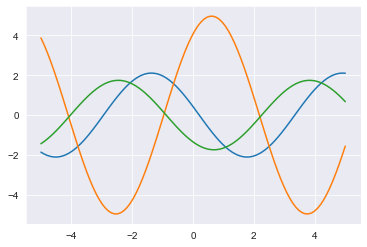

In [2]:
class SineWaveTask:
    def __init__(self):
        self.a = np.random.uniform(0.1, 5.0)
        self.b = np.random.uniform(0, 2*np.pi)
        self.train_x = None
        
    def f(self, x):
        return self.a * np.sin(x + self.b)
        
    def training_set(self, size=10, force_new=False):   ## generate 10 pairs/samples for training
        if self.train_x is None and not force_new:
            self.train_x = np.random.uniform(-5, 5, size)
            x = self.train_x
        elif not force_new:
            x = self.train_x
        else:
            x = np.random.uniform(-5, 5, size)
        y = self.f(x)
        return torch.Tensor(x), torch.Tensor(y)
    
    def test_set(self, size=50):  ## generate 50 pairs for test 
        x = np.linspace(-5, 5, size)
        y = self.f(x)
        return torch.Tensor(x), torch.Tensor(y)
    
    def plot(self, *args, **kwargs):
        x, y = self.test_set(size=100)  # generate 100 pairs/samples for plot
        return plt.plot(x.numpy(), y.numpy(), *args, **kwargs)
    
SineWaveTask().plot()
SineWaveTask().plot()
SineWaveTask().plot()
plt.show()

To understand why this is going to be a problem for transfer learning, let's plot 1,000 of them:

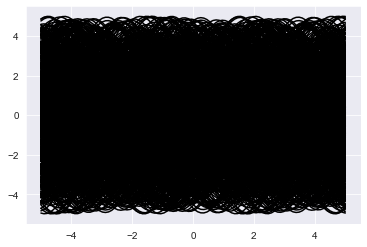

In [3]:
for _ in range(1000):
    SineWaveTask().plot(color='black')

Looks like there is a lot of overlap at each x value, to say the least...

Since there are multiple possible values for each x across multiple tasks, if we train a single neural net to deal with multiple tasks at the same time, its best bet will simply be to return the *average* y value across all tasks for each x. What does that look like?

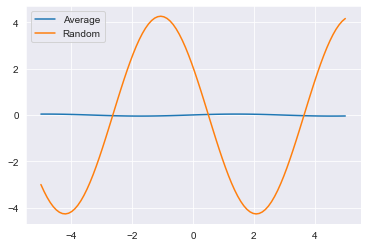

In [4]:
all_x, all_y = [], []

for _ in range(10000):
    curx, cury = SineWaveTask().test_set(size=100)
    all_x.append(curx.numpy())
    all_y.append(cury.numpy())

avg, = plt.plot(all_x[0], np.mean(all_y, axis=0))
rand, = SineWaveTask().plot()
plt.legend([avg, rand], ['Average', 'Random'])
plt.show()

The average is basically 0, which means a neural network trained on a lot of tasks would simply return 0 everywhere! It is unclear that this will actually help very much, and yet this **is** the transfer learning approach in this case...

Let’s see how the methods (e.g., transfer learning, MAML, and Reptile) work by first actually implementing a simple model to solve these sine wave tasks and then training it using each of these methods. 

To do this, we generate Meta-training including 10k tasks and Meta-testing including 1k tasks.
In Meta-training, each task includes a training set and a testing set, we employ training set to learn the model parameter a and b, and then predict the testing set with the learnt <font color = red>a</font> and <font color = red>b</font>. After learning all 10k tasks, we output <font color = red>$F^*$</font>.

In Meta-test, for each task including a support set and a query set, we emplpoy <font color = red>$F^*$</font> and the support set to learn <font color = red>$f^*$</font>, i.e., predicting the values of a and b, and then predict the y vales of each x in the query set by the learnt <font color = red>a</font> and <font color = red>b</font>.




### Comments on `SineModel` and `sine_fit1`

`SineModel` constructs a deep learning model including 2 hidden layers and 1 output layer

`sine_fit1` outputs the test loss for each task in either Meta-training or Meta-testing

To do this,

- 1 `sine_fit1` uses the training data to calculate the traning loss

- 2  `sine_fit1`  conducts the backpropogation to adjust the gradient

- 3  `sine_fit1`  stores the sumation of the test loss for each task


In [5]:
TRAIN_SIZE = 10000
TEST_SIZE = 1000

################################################################################################
################################   you can ignore the following code ###############################
################################         start    ################################################################
################################################################################################
class ModifiableModule(nn.Module):
    def params(self):
        return [p for _, p in self.named_params()]
    
    def named_leaves(self):
        return []
    
    def named_submodules(self):
        return []
    
    def named_params(self):
        subparams = []
        for name, mod in self.named_submodules():
            for subname, param in mod.named_params():
                subparams.append((name + '.' + subname, param))
        return self.named_leaves() + subparams
    
    def set_param(self, name, param):
        if '.' in name:
            n = name.split('.')
            module_name = n[0]
            rest = '.'.join(n[1:])
            for name, mod in self.named_submodules():
                if module_name == name:
                    mod.set_param(rest, param)
                    break
        else:
            setattr(self, name, param)
            
    def copy(self, other, same_var=False):
        for name, param in other.named_params():
            if not same_var:
                param = V(param.data.clone(), requires_grad=True)
            self.set_param(name, param)

class GradLinear(ModifiableModule):
    def __init__(self, *args, **kwargs):
        super().__init__()
        ignore = nn.Linear(*args, **kwargs)
        self.weights = V(ignore.weight.data, requires_grad=True)
        self.bias = V(ignore.bias.data, requires_grad=True)
        
    def forward(self, x):
        return F.linear(x, self.weights, self.bias)
    
    def named_leaves(self):
        return [('weights', self.weights), ('bias', self.bias)]
    
################################################################################################
################################   End  ###############################
################################      ################################################################
################################################################################################    
    
    
##### SineModel generates an NN model including 2 hidden layers and 1 output layer  ########    
##### All methods (i.e., Transfer learning, MAML, Reptile SineModel) use it         ######## 
class SineModel(ModifiableModule):
    def __init__(self):
        super().__init__()
        self.hidden1 = GradLinear(1, 40)
        self.hidden2 = GradLinear(40, 40)
        self.out = GradLinear(40, 1)
        
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        return self.out(x)
    
    def named_submodules(self):
        return [('hidden1', self.hidden1), ('hidden2', self.hidden2), ('out', self.out)]

### randomly generate 10k training tasks, each task includes 10 pairs of traning sets and 50 pairs of test set
SINE_TRAIN = [SineWaveTask() for _ in range(TRAIN_SIZE)] 

### randomly generate 1k test tasks, each task includes 10 pairs of traning sets and 50 pairs of test set
SINE_TEST = [SineWaveTask() for _ in range(TEST_SIZE)]    


####  generate a new training set ony  ########
ONE_SIDED_EXAMPLE = None
while ONE_SIDED_EXAMPLE is None:
    cur = SineWaveTask()
    x, _ = cur.training_set()
    x = x.numpy()
    if np.max(x) < 0 or np.min(x) > 0:
        ONE_SIDED_EXAMPLE = cur

#### sine_fit1 geneerates the test loss for each task and then output the test loss of all tasks   
##### All methods (i.e., Transfer learning, MAML, Reptile SineModel) use it         ######## 
def sine_fit1(net, wave, optim=None, get_test_loss=False, create_graph=False, force_new=False):
    net.train()
    if optim is not None:
        optim.zero_grad()
    x, y = wave.training_set(force_new=force_new)
    loss = F.mse_loss(net(V(x[:, None])), V(y).unsqueeze(1))  ## calculate the training loss
    loss.backward(create_graph=create_graph, retain_graph=True)
    if optim is not None:
        optim.step()     #################  update the parameters based the parameters of the former tasks
    if get_test_loss:
        net.eval()
        x, y = wave.test_set()
        loss_test = F.mse_loss(net(V(x[:, None])), V(y))  ## calculate the test loss
        return loss.data.cpu().numpy()[0], loss_test.data.cpu().numpy()[0]  ## store the test loss
    return loss.data.cpu().numpy()#[0]  ## return the test loss


In [6]:
### copy_sine_model copies a model

def copy_sine_model(model):
    m = SineModel()
    m.copy(model)
    return m

## output the test loss for each task
## input: model, training set and test set for one test task
## output: the test loss
def eval_sine_test(model, test, fits=(0, 1), lr=0.01):
    ##  obtain the train data and test data for one test task
    xtest, ytest = test.test_set()
    xtrain, ytrain = test.training_set()
    
    
    model = copy_sine_model(model)      ############## copy meta-training model F* for meta-testing
    
    
    optim = torch.optim.Adam(model.params(), lr)
        
    def get_loss(res):
        return F.mse_loss(res, V(ytest[:, None])).cpu().data.numpy()#[0]
    
    fit_res = []
    if 0 in fits:   ## output the loss of the 0 iteration
        results = model(V(xtest[:, None]))
        fit_res.append((0, results, get_loss(results)))
    
    ##  output the test loss of the i-th iteration
    for i in range(np.max(fits)):
        sine_fit1(model, test, optim)  ## the test loss for each test task
        if i + 1 in fits:
            results = model(V(xtest[:, None]))
            fit_res.append(
                (
                    i + 1, 
                    results,
                    get_loss(results)
                )
            )

    return fit_res

def plot_sine_test(model, test, fits=(0, 1), lr=0.01):
    xtest, ytest = test.test_set()
    xtrain, ytrain = test.training_set()

    fit_res = eval_sine_test(model, test, fits, lr)
    
    train, = plt.plot(xtrain.numpy(), ytrain.numpy(), '^')
    ground_truth, = plt.plot(xtest.numpy(), ytest.numpy())
    plots = [train, ground_truth]
    legend = ['Training Points', 'True Function']
    for n, res, loss in fit_res:
        cur, = plt.plot(xtest.numpy(), res.cpu().data.numpy()[:, 0], '--')
        plots.append(cur)
        legend.append(f'After {n} Steps')
    plt.legend(plots, legend)
    plt.show()

In [7]:
### SINE_TRANSFER inlcludes 2 hidden layers and 1 output layer
SINE_TRANSFER = SineModel()

def fit_transfer(epochs=1):
    ## randomely initialize the parameters of the optimization of the gadient descent method
    optim = torch.optim.Adam(SINE_TRANSFER.params())    

    for _ in range(epochs):  ## only run the base set once
        for t in random.sample(SINE_TRAIN, len(SINE_TRAIN)): ## the base set includes 10k training tasks
            sine_fit1(SINE_TRANSFER, t, optim)   ## output the test loss of 10k traning tasks
fit_transfer()

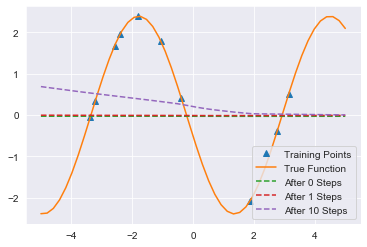

0.21701499999999996


In [8]:
import time

start = time.clock()
plot_sine_test(SINE_TRANSFER, SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
end = time.clock()

print (str(end-start))

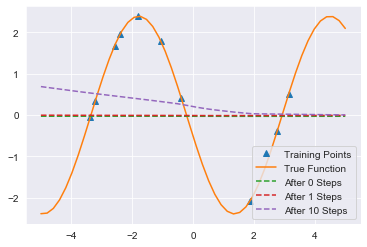

0.21039600000000291


In [9]:
import time

start = time.clock()
plot_sine_test(SINE_TRANSFER, SINE_TEST[0], fits=(0, 1, 10), lr=0.01)
end = time.clock()

print (str(end-start))

Basically it looks like our transfer model learns a constant function and that it is really hard to fine tune it to something better than a constant function. It's not even clear that our transfer learning is any better than random initialization...

639.0098360000001


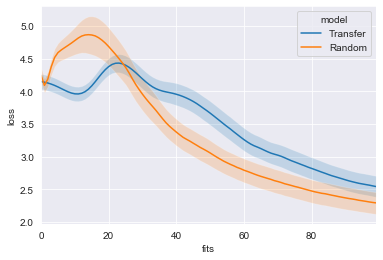

In [10]:
def plot_sine_learning(models, fits=(0, 1), lr=0.01, marker='s', linestyle='--'):
    data = {'model': [], 'fits': [], 'loss': [], 'set': []}
    for name, models in models:
        if not isinstance(models, list):
            models = [models]
        for n_model, model in enumerate(models):
            for n_test, test in enumerate(SINE_TEST):
                n_test = n_model * len(SINE_TEST) + n_test
                fit_res = eval_sine_test(model, test, fits, lr)
                for n, _, loss in fit_res:
                    data['model'].append(name)
                    data['fits'].append(n)
                    data['loss'].append(loss)
                    data['set'].append(n_test)
        
    ax = sbs.tsplot(
        pd.DataFrame(data), condition='model', value='loss',
        time='fits', unit='set', marker=marker, linestyle=linestyle)
 

start = time.clock()

plot_sine_learning(
    [('Transfer', SINE_TRANSFER), ('Random', SineModel())],
    list(range(100)),
    marker='',
    linestyle='-'
)
end = time.clock()

print (str(end-start))

# MAML

We now come to MAML, the first of the two algorithms we will look at today.

As mentioned before, we are trying to find a set of weights such that running gradient descent on similar tasks makes progress as quickly as possible. MAML takes this *extremely literally* by running one iteration of gradient descent and then updating the initial weights based on how much progress that one iteration made towards the true task. More concretely it:
* Creates a copy of the initialization weights
* Runs an iteration of gradient descent for a random task on the copy
* Backpropagates the loss on a *test* set through the iteration of gradient descent and back to the initial weights, so that we can update the initial weights in a direction in which they would have been easier to update.

We thus need to take a gradient of a gradient, aka a second degree derivative in this process. Fortunately this is something that PyTorch supports now, unfortunately PyTorch makes it a bit awkward to update the parameters of a model in a way that we can still run gradient descent through them (we already saw this is "Learning to Learn by Gradient Descent by Gradient Descent"), which explains the weird way in which the model is written.

Because we are going to use second derivatives, we need to make sure that the computational graph that allowed us to compute the original gradients stays around, which is why we pass `create_graph=True` to `.backward()`.

The code below also implements first order MAML, which we explain later:

In [11]:
def maml_sine(model, epochs, lr_inner=0.01, batch_size=1, first_order=False):
    optimizer = torch.optim.Adam(model.params()) ## update the parameters based on the parameters of the former epoch
    
    for _ in tqdm(range(epochs)):
        # Note: the paper doesn't specify the meta-batch size for this task,
        # so I just use 1 for now.
        for i, t in enumerate(random.sample(SINE_TRAIN, len(SINE_TRAIN))):  ### 10k traning tasks
            new_model = SineModel()
            new_model.copy(model, same_var=True)  ## update the parameters based on the parameters of the former task
            loss = sine_fit1(new_model, t, create_graph=not first_order)
            
            ## calculate the gradient with two methods, i.e., Newton's method and first-order method
            for name, param in new_model.named_params():
                grad = param.grad
                if first_order:
                    grad = V(grad.detach().data)
                new_model.set_param(name, param - lr_inner * grad)
                        
            sine_fit1(new_model, t, force_new=True)

            if (i + 1) % batch_size == 0:
                optimizer.step()
                optimizer.zero_grad()

## generate 5 same SineModels including 2 hidden layers and 1 output layer
SINE_MAML = [SineModel() for _ in range(5)]

for m in SINE_MAML:
    maml_sine(m, 4)  ## Run each model 4 epoches.

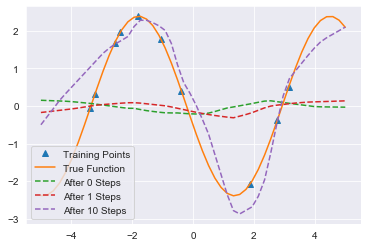

In [12]:
plot_sine_test(SINE_MAML[0], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

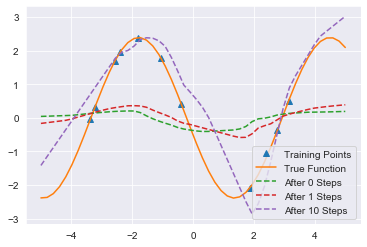

In [13]:
plot_sine_test(SINE_MAML[1], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

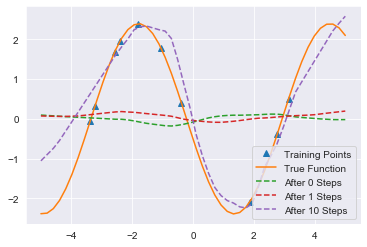

In [14]:
plot_sine_test(SINE_MAML[2], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

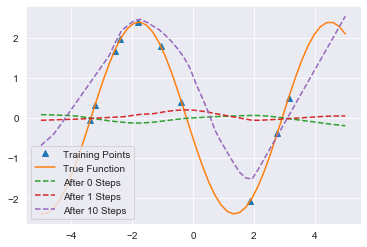

In [15]:
plot_sine_test(SINE_MAML[3], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

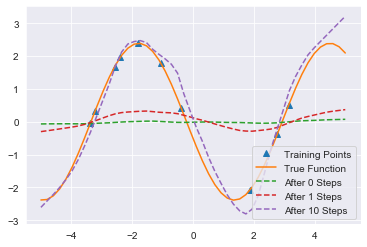

In [16]:
plot_sine_test(SINE_MAML[4], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

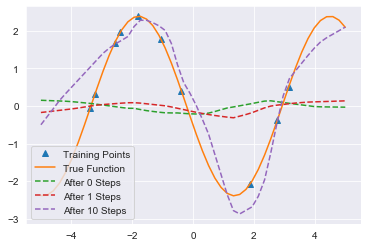

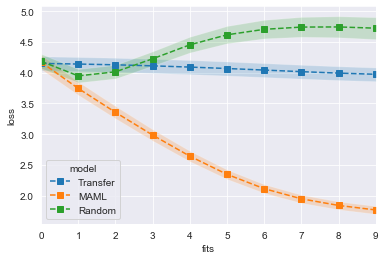

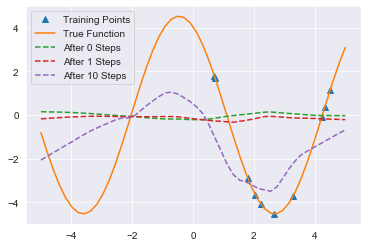

In [17]:
plot_sine_test(SINE_MAML[0], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

plot_sine_learning(
    [('Transfer', SINE_TRANSFER), ('MAML', SINE_MAML[0]), ('Random', SineModel())],
    list(range(10)),
)
plt.show()

plot_sine_test(SINE_MAML[0], ONE_SIDED_EXAMPLE, fits=[0, 1, 10], lr=0.01)
plt.show()

So MAML works **much** better than transfer learning or random initialization for this problem. Yay!

However, it is a bit annoying that we have to use second order derivatives for this... it forces the code to be complicated and it also makes things a fair bit slower (around 33% according to the paper, which matches what we shall see here).

Is there an approximation of MAML that doesn't use the second order derivatives? Of course, we can simply pretend that the gradients that we used for the inner gradient descent just came out of nowhere, and thus just improve the initial parameters without taking into account these second order derivatives, which is what we did before by handling the `first_order` parameter.

So how good is this first order approximation? Almost as good as the original MAML, as it turns out!

In [18]:
SINE_MAML_FIRST_ORDER = [SineModel() for _ in range(5)]

for m in SINE_MAML_FIRST_ORDER:
    maml_sine(m, 4, first_order=True)

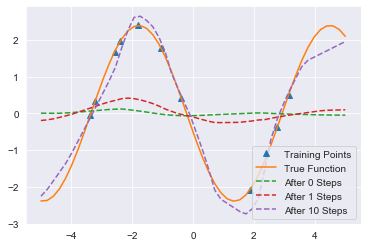

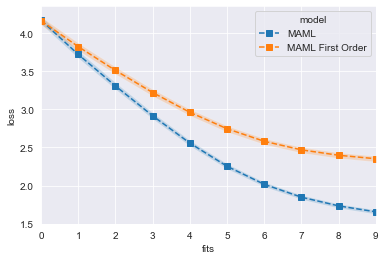

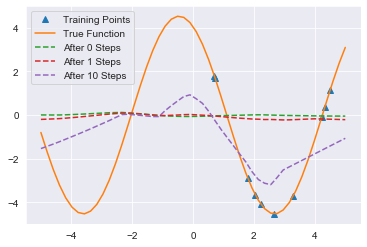

In [19]:
plot_sine_test(SINE_MAML_FIRST_ORDER[0], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

plot_sine_learning(
    [('MAML', SINE_MAML), ('MAML First Order', SINE_MAML_FIRST_ORDER)],list(range(10)),)
plt.show()

plot_sine_test(SINE_MAML_FIRST_ORDER[0], ONE_SIDED_EXAMPLE, fits=[0, 1, 10], lr=0.01)
plt.show()

# Reptile

The first order approximation for MAML tells us that something interesting is going on: after all, it seems like how the gradients were generated should be relevant for a good initialization, and yet it apparently isn't so much.

Reptile takes this idea even further by telling us to do the following: run SGD for **a few** iterations on a given task, and then move your initialization weights a little bit in the direction of the weights you obtained after your k iterations of SGD. An algorithm so simple, it takes only a couple lines of pseudocode:
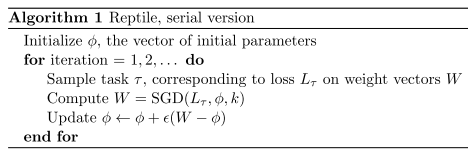

When I first read this, I was quite consternated: isn't this the same as training your weights alternatively on each task, just like in transfer learning? How would this ever work?

Indeed, the Reptile paper anticipates this very reaction:
> You might be thinking “isn’t this the same as training on the expected loss Eτ \[Lτ\]?” and then checking if the date is April 1st.

As it happens, I am writing this on April 2nd, so this is all serious. So what's going on?

Well, indeed if we had run SGD for a single iteration, we would have something equivalent to the transfer learning described above, but we aren't we are using **a few** iterations, and so indeed the weights we update towards each time actually depend indirectly on the second derivatives of the loss, similar to MAML.

Ok, but still, why would this work? Well Reptile provides a compelling intuition for this: for each task, there are weights that are optimal. Indeed, there are probably **many** sets of weights that are optimal. This means that if you take several tasks, there should be a set of weights for which the distance to at least one optimal set of weights for each task is minimal. This set of weights is where we want to initialize our networks, since it is likely to be the one for which the least work is necessary to reach the optimum for any task. This is the set of weights that Reptile finds.

We can see this expressed visually in the following image: the two black lines represent the sets of optimal weights for two different tasks, while the gray line represents the initialization weights. Reptile tries to get the initialization weights closer and closer to the point where the optimal weights are nearest to each other.

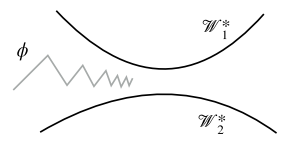

Let's now implement Reptile and compare it to MAML:

In [20]:
def reptile_sine(model, epochs, lr_inner=0.01, lr_outer=0.001, k=32, batch_size=32):
    optimizer = torch.optim.Adam(model.params(), lr=lr_outer)
    
    name_to_param = dict(model.named_params())
    
    for _ in tqdm(range(epochs)):
        for i, t in enumerate(random.sample(SINE_TRAIN, len(SINE_TRAIN))):
            new_model = SineModel()
            new_model.copy(model)
            inner_optim = torch.optim.Adam(new_model.params(), lr=lr_inner)
            for _ in range(k):     ## different from MAML
                sine_fit1(new_model, t, inner_optim)
                        
            for name, param in new_model.named_params():
                cur_grad = (name_to_param[name].data - param.data) / k / lr_inner
                if name_to_param[name].grad is None:
                    name_to_param[name].grad = V(torch.zeros(cur_grad.size()))  ## different from MAML
                name_to_param[name].grad.data.add_(cur_grad / batch_size)
#                 if (i + 1) % 500 == 0:
#                     print(name_to_param[name].grad)
                
            if (i + 1) % batch_size == 0:
                to_show = name_to_param['hidden1.bias']
                optimizer.step()
                optimizer.zero_grad()

SINE_REPTILE = [SineModel() for _ in range(5)]

for m in SINE_REPTILE:
    reptile_sine(m, 4, k=3, batch_size=1)

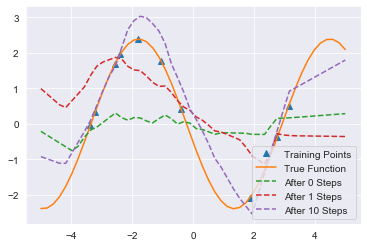

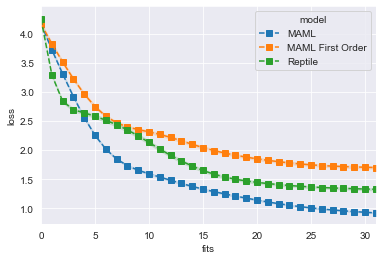

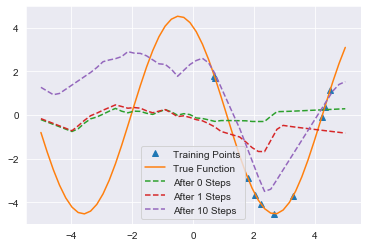

In [21]:
plot_sine_test(SINE_REPTILE[0], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

plot_sine_learning(
    [('MAML', SINE_MAML), ('MAML First Order', SINE_MAML_FIRST_ORDER), ('Reptile', SINE_REPTILE)], 
    list(range(32)),
)
plt.show()

plot_sine_test(SINE_REPTILE[0], ONE_SIDED_EXAMPLE, fits=[0, 1, 10], lr=0.01)
plt.show()

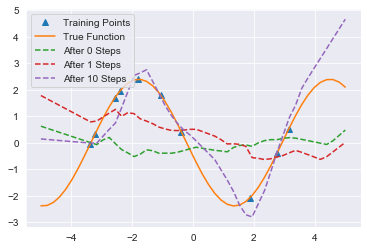

In [22]:
plot_sine_test(SINE_REPTILE[1], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

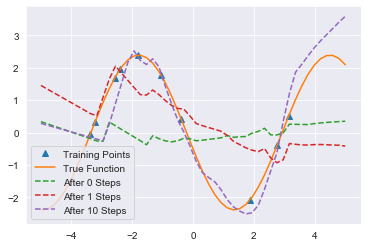

In [23]:
plot_sine_test(SINE_REPTILE[2], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

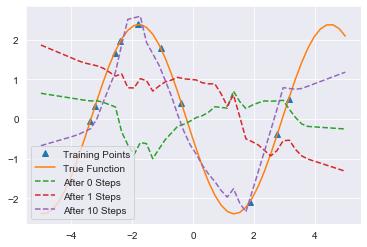

In [24]:
plot_sine_test(SINE_REPTILE[3], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

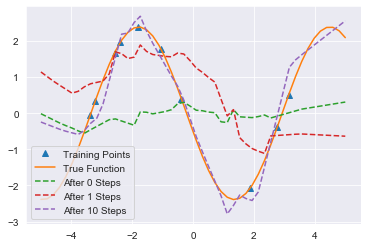

In [25]:
plot_sine_test(SINE_REPTILE[4], SINE_TEST[0], fits=[0, 1, 10], lr=0.01)
plt.show()

It looks like Reptile does indeed achieve similar or even slightly better performance to MAML with a much simpler and slightly faster algorithm! Very exciting. And this applies to many more problems than just this toy example of sine waves! For more details, I really do recommend you read the paper. At this point, you should have enough background to understand them quite easily.

https://www.kdnuggets.com/2020/03/few-shot-image-classification-meta-learning.html

https://towardsdatascience.com/paper-repro-deep-metalearning-using-maml-and-reptile-fd1df1cc81b0